In [ ]:
# Class name: AI1811
# Student code: HE181685
# Student name: Nguyễn Thành Trung
# Subject: CPV-LAB2

In [4]:
pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [1]:
#Funtion 1
#Nhậnhình ảnh và các giá trị cân bằng màu cho các kênh đỏ, xanh lá và xanh dương
def adjust_color_balance(image, red_balance, green_balance, blue_balance):
    b, g, r = cv2.split(image)
    b = cv2.addWeighted(b, 1.0, np.zeros(b.shape, b.dtype), 0, blue_balance)
    g = cv2.addWeighted(g, 1.0, np.zeros(g.shape, g.dtype), 0, green_balance)
    r = cv2.addWeighted(r, 1.0, np.zeros(r.shape, r.dtype), 0, red_balance)
    balanced_image = cv2.merge([b, g, r])
    return balanced_image
#Input path
def clean_input(input_string):
    return input_string.replace("\\", "/").replace('"', '').replace("'", '')
image_path = input()
converted_path = clean_input(image_path)
image = cv2.imread(converted_path)
#Tạo cửa sổ và thanh trượt 
cv2.namedWindow('Color Balance')
cv2.createTrackbar('Red', 'Color Balance', 0, 100, nothing)
cv2.createTrackbar('Green', 'Color Balance', 0, 100, nothing)
cv2.createTrackbar('Blue', 'Color Balance', 0, 100, nothing)
#Tạo vòng lặp
while True:
    red_balance = cv2.getTrackbarPos('Red', 'Color Balance')
    green_balance = cv2.getTrackbarPos('Green', 'Color Balance')
    blue_balance = cv2.getTrackbarPos('Blue', 'Color Balance')
    balanced_image = adjust_color_balance(image, red_balance, green_balance, blue_balance)
    cv2.imshow('Color Balance', balanced_image)
    #Phím nhắn để thoát vòng lặp
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()

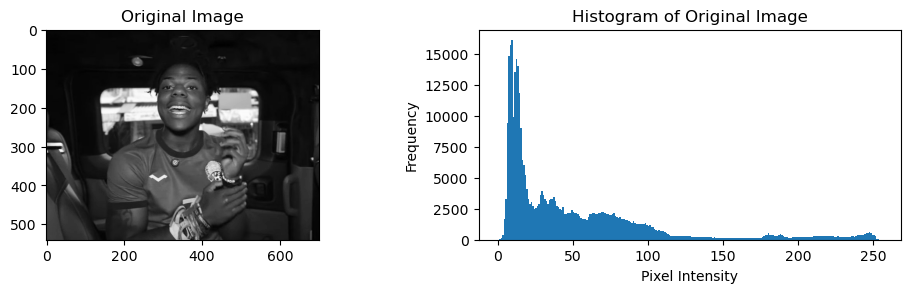

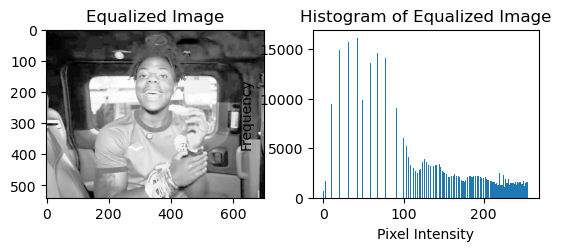

<Figure size 640x480 with 0 Axes>

In [25]:
#Function 2
#Vẽ histogram
def plot_histogram(image, title):
    plt.hist(image.ravel(), 256, [0, 256])
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()
#Input path
# Đoạn này em làm để input path nma bị bug ko fix dc ạ T.T
#def clean_input(input_string):
#    return input_string.replace("\\", "/").replace('"', '').replace("'", '')
#image_path = input()
#converted_path = clean_input(image_path)
#image = cv2.imread(converted_path,0)
image = cv2.imread("C:/Users/pagmas.saint/Downloads/460959177_912125187610430_3601541509268645257_n.jpg",0)#thay path vào trong dấu ""
# Hiển thị ảnh gốc và histogram 
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(2, 2, 2)
plot_histogram(image, 'Histogram of Original Image')
# Cân bằng histogram
equalized_image = cv2.equalizeHist(image)
# Hiển thị ảnh đã cân bằng và histogram 
plt.subplot(2, 2, 1)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')

plt.subplot(2, 2, 2)
plot_histogram(equalized_image, 'Histogram of Equalized Image')

plt.tight_layout()
plt.show()


In [11]:
#Function 3, 4, 5
#3 hàm Median, Mean, và Gaussian
def apply_median_filter(image, ksize=5):
    return cv2.medianBlur(image, ksize)

def apply_mean_filter(image, ksize=5):
    return cv2.blur(image, (ksize, ksize))

def apply_gaussian_filter(image, ksize=5, sigma=0):
    return cv2.GaussianBlur(image, (ksize, ksize), sigma)
#Input path    
def clean_input(input_string):
    return input_string.replace("\\", "/").replace('"', '').replace("'", '')
image_path = input()
converted_path = clean_input(image_path)
image = cv2.imread(converted_path)
#Tạo cửa sổ nếu đọc được ảnh, và thanh trượt
if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    cv2.namedWindow('Image Processing')
cv2.createTrackbar('Median Filter', 'Image Processing', 0, 1, nothing)
cv2.createTrackbar('Mean Filter', 'Image Processing', 0, 1, nothing)
cv2.createTrackbar('Gaussian Filter', 'Image Processing', 0, 1, nothing)

prev_values = [-1, -1, -1]
#Tạo vòng lặp, giá trị và áp dụng hàm
while True:
    median_filter = cv2.getTrackbarPos('Median Filter', 'Image Processing')
    mean_filter = cv2.getTrackbarPos('Mean Filter', 'Image Processing')
    gaussian_filter = cv2.getTrackbarPos('Gaussian Filter', 'Image Processing')

    processed_image = image.copy()
    if median_filter == 1:
        processed_image = apply_median_filter(processed_image)
    if mean_filter == 1:
        processed_image = apply_mean_filter(processed_image)
    if gaussian_filter == 1:
        processed_image = apply_gaussian_filter(processed_image)
#Hiển thị hình ảnh
    cv2.imshow('Image Processing', processed_image)
#Phím nhấn để thoát vòng lặp
    if cv2.waitKey(1) & 0xFF == 27:
        break

cv2.destroyAllWindows()

 "C:\Users\pagmas.saint\Downloads\460959177_912125187610430_3601541509268645257_n.jpg"
